# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [49]:
import tensorflow as tf

## Get the dataset

In [50]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [51]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [52]:
# Pre processing 
X_train = X_train/255.0
X_test = X_test/255.0

In [53]:
print(Y_train.shape)
print(Y_test.shape)

(8000,)
(2000,)


## Visualize the dataset
Print some images with labels.

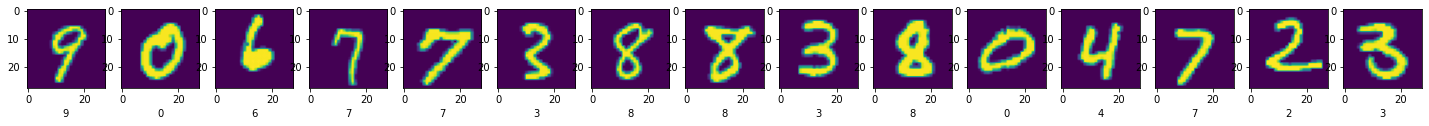

In [60]:
import matplotlib.pyplot as plt

# Your code

fig, axis = plt.subplots(1,15,figsize=(25,5))


for i in range(0,15):
    axis[i].imshow(X_test[i])
    
for i, ax in enumerate(axis.flat):
    ax.set(xlabel= Y_test[i])


Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [61]:
import numpy as np

nums = np.zeros(10, dtype='int')
for i in Y_train:
    nums[i] += 1

print(nums)

[782 907 836 814 768 700 769 816 812 796]


## Model

In [56]:
# model building
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

In [57]:
# Compile the model (add optimizers and metrics)
model.compile(loss=loss, optimizer=optim, metrics=metrics)

# Fit the model on the training data (specify validation_split, read about validation if new to you)
model.fit(X_train, Y_train, epochs=10, shuffle=True, verbose=2)

prob_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

model.evaluate(X_test, Y_test, verbose=2)


Epoch 1/10
250/250 - 3s - loss: 0.5644 - accuracy: 0.8470 - 3s/epoch - 14ms/step
Epoch 2/10
250/250 - 0s - loss: 0.2438 - accuracy: 0.9280 - 398ms/epoch - 2ms/step
Epoch 3/10
250/250 - 0s - loss: 0.1800 - accuracy: 0.9470 - 397ms/epoch - 2ms/step
Epoch 4/10
250/250 - 0s - loss: 0.1353 - accuracy: 0.9613 - 398ms/epoch - 2ms/step
Epoch 5/10
250/250 - 0s - loss: 0.1060 - accuracy: 0.9697 - 391ms/epoch - 2ms/step
Epoch 6/10
250/250 - 0s - loss: 0.0793 - accuracy: 0.9795 - 393ms/epoch - 2ms/step
Epoch 7/10
250/250 - 0s - loss: 0.0614 - accuracy: 0.9860 - 389ms/epoch - 2ms/step
Epoch 8/10
250/250 - 0s - loss: 0.0461 - accuracy: 0.9895 - 382ms/epoch - 2ms/step
Epoch 9/10
250/250 - 0s - loss: 0.0367 - accuracy: 0.9927 - 391ms/epoch - 2ms/step
Epoch 10/10
250/250 - 0s - loss: 0.0271 - accuracy: 0.9959 - 383ms/epoch - 2ms/step
63/63 - 0s - loss: 0.1410 - accuracy: 0.9545 - 274ms/epoch - 4ms/step


[0.14097362756729126, 0.9545000195503235]

## Predict some images
Print the image along with its label (true value) and predicted value.

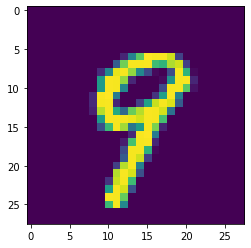

Predicted: 9


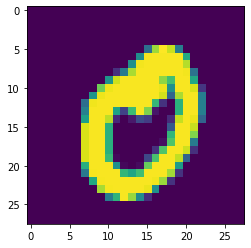

Predicted: 0


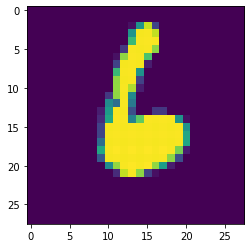

Predicted: 6


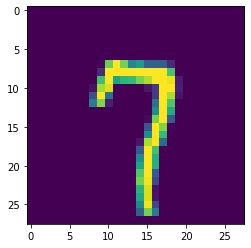

Predicted: 7


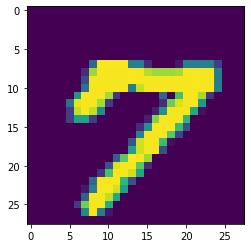

Predicted: 7


In [63]:
y_pred = prob_model(X_test)
y_pred = np.argmax(y_pred, axis=1)

for i in range(5):
    plt.imshow(X_test[i])
    plt.show()
    print('Predicted:', y_pred[i])